In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [10]:
plt.style.use('ggplot')

In [4]:
ratings = pd.read_csv('./ratings.csv', encoding='latin-1')

In [5]:
ratings

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt10048342,9,2020-10-27,The Queen's Gambit,https://www.imdb.com/title/tt10048342/,tvMiniSeries,8.7,393.0,2020,Drama,203323,2020-10-23,NaN
1,tt10062292,8,2020-10-27,Never Have I Ever,https://www.imdb.com/title/tt10062292/,tvSeries,7.9,30.0,2020,Comedy,23077,2020-04-27,NaN
2,tt1025100,2,2020-02-20,Gemini Man,https://www.imdb.com/title/tt1025100/,movie,5.7,117.0,2019,"Action, Drama, Sci-Fi, Thriller",84857,2019-09-25,Ang Lee
3,tt1034415,6,2020-03-03,Suspiria,https://www.imdb.com/title/tt1034415/,movie,6.8,152.0,2018,"Fantasy, Horror, Mystery, Thriller",61150,2018-09-01,Luca Guadagnino
4,tt0104940,7,2020-12-30,The Muppet Christmas Carol,https://www.imdb.com/title/tt0104940/,movie,7.7,85.0,1992,"Comedy, Drama, Family, Fantasy, Musical",50042,1992-12-06,Brian Henson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,tt9358052,8,2019-05-14,Knock Down the House,https://www.imdb.com/title/tt9358052/,movie,7.1,87.0,2019,Documentary,11352,2019-01-27,Rachel Lears
204,tt9683478,6,2020-05-09,The Half of It,https://www.imdb.com/title/tt9683478/,movie,6.9,104.0,2020,"Comedy, Drama, Romance",27028,2020-05-01,Alice Wu
205,tt9806192,8,2019-12-15,J'ai perdu mon corps,https://www.imdb.com/title/tt9806192/,movie,7.6,81.0,2019,"Animation, Drama, Fantasy, Romance",26101,2019-05-17,Jérémy Clapin
206,tt0098635,8,2020-07-07,When Harry Met Sally...,https://www.imdb.com/title/tt0098635/,movie,7.6,95.0,1989,"Comedy, Drama, Romance",194558,1989-07-12,Rob Reiner


In [117]:
ratings['rating_diff'] = ratings['Your Rating'] - ratings['IMDb Rating']

In [126]:
ratings[['Title', 'Your Rating', 'IMDb Rating', 'rating_diff']].sort_values('rating_diff').tail(10)

,Title,Your Rating,IMDb Rating,rating_diff
86,Baby Driver,9,7.6,1.4
192,The Farewell,9,7.6,1.4
182,The Lighthouse,9,7.5,1.5
121,The Favourite,9,7.5,1.5
140,Phantom Thread,9,7.5,1.5
183,Tuca & Bertie,9,7.4,1.6
115,Lady Bird,9,7.4,1.6
188,The Darjeeling Limited,9,7.2,1.8
10,Paddington,9,7.2,1.8
21,The World's End,9,7.0,2.0


In [127]:
ratings[['Title', 'Your Rating', 'IMDb Rating', 'rating_diff']].sort_values('rating_diff').head(10)

,Title,Your Rating,IMDb Rating,rating_diff
97,P.S. I Love You,1,7.0,-6.0
207,Holidate,1,6.1,-5.1
153,Dark Phoenix,1,5.8,-4.8
58,Men in Black: International,1,5.6,-4.6
26,The Twilight Saga: Breaking Dawn - Part 1,1,4.9,-3.9
184,Yesterday,3,6.8,-3.8
2,Gemini Man,2,5.7,-3.7
39,The Twilight Saga: Breaking Dawn - Part 2,2,5.5,-3.5
191,Last Christmas,3,6.5,-3.5
151,Serenity,2,5.4,-3.4


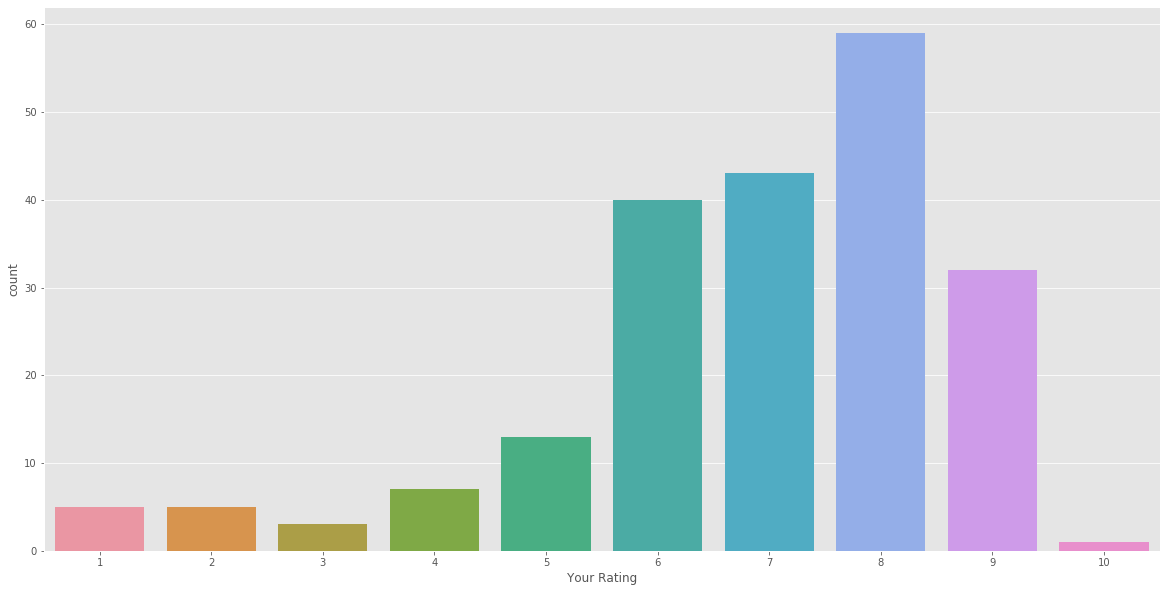

In [128]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x=ratings['Your Rating'])

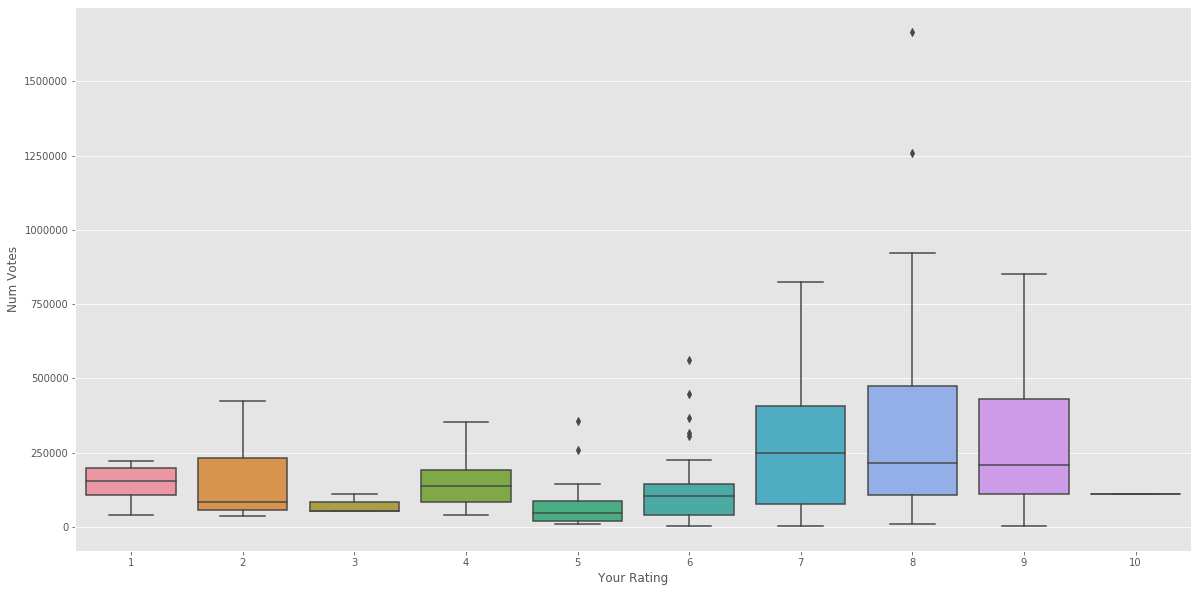

In [113]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=ratings['Your Rating'], y=ratings['Num Votes'])

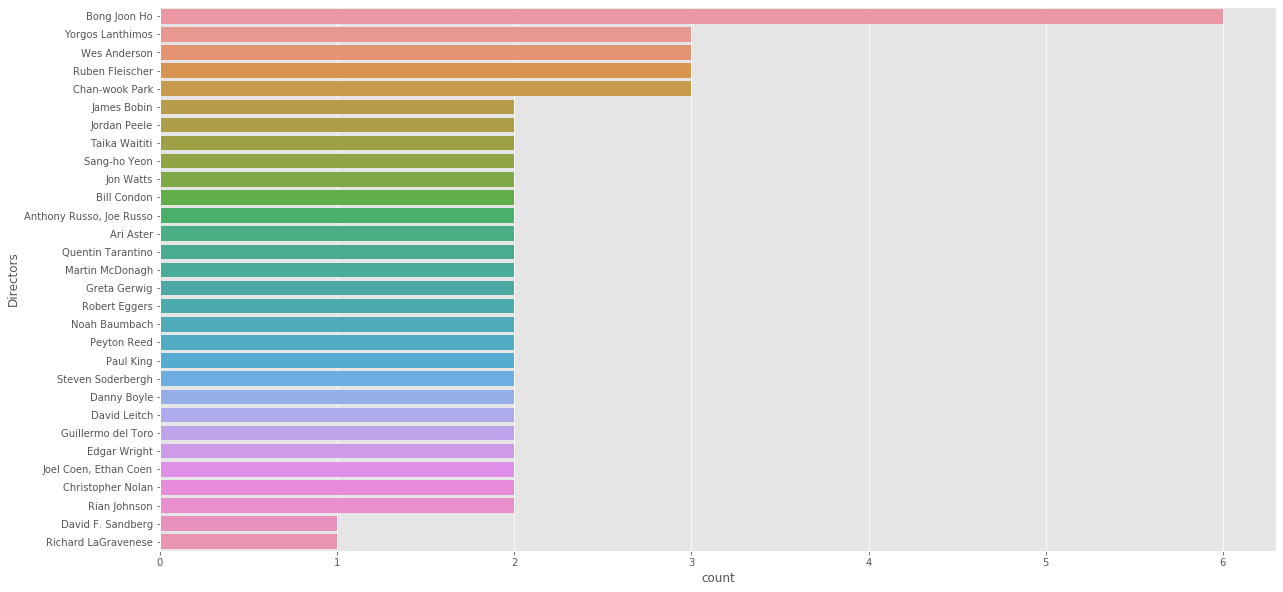

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y=ratings['Directors'], order=pd.value_counts(ratings['Directors']).iloc[:30].index)

In [88]:
most_frequent_directors = ratings.loc[ratings['Directors'].isin(pd.value_counts(ratings['Directors']).iloc[:30].index)]

In [89]:
most_frequent_directors

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
10,tt1109624,9,2020-04-21,Paddington,https://www.imdb.com/title/tt1109624/,movie,7.2,95.0,2014,"Adventure, Comedy, Family, Fantasy",97789,2014-11-23,Paul King
14,tt1156398,9,2019-11-09,Zombieland,https://www.imdb.com/title/tt1156398/,movie,7.6,88.0,2009,"Adventure, Comedy, Fantasy, Horror, Sci-Fi",518212,2009-09-25,Ruben Fleischer
19,tt1204342,7,2020-12-30,The Muppets,https://www.imdb.com/title/tt1204342/,movie,7.1,120.0,2011,"Adventure, Comedy, Family, Musical",87216,2011-11-04,James Bobin
21,tt1213663,9,2020-03-27,The World's End,https://www.imdb.com/title/tt1213663/,movie,7.0,109.0,2013,"Comedy, Sci-Fi",259031,2013-07-10,Edgar Wright
22,tt1216496,9,2020-03-29,Madeo,https://www.imdb.com/title/tt1216496/,movie,7.8,129.0,2009,"Crime, Drama, Mystery, Thriller",51965,2009-05-16,Bong Joon Ho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,tt8079248,3,2019-11-09,Yesterday,https://www.imdb.com/title/tt8079248/,movie,6.8,116.0,2019,"Comedy, Fantasy, Music, Romance",111648,2019-05-04,Danny Boyle
188,tt0838221,9,2019-11-17,The Darjeeling Limited,https://www.imdb.com/title/tt0838221/,movie,7.2,91.0,2007,"Adventure, Comedy, Drama",179684,2007-08-31,Wes Anderson
193,tt8772262,8,2020-03-03,Midsommar,https://www.imdb.com/title/tt8772262/,movie,7.1,148.0,2019,"Drama, Horror, Mystery, Thriller",196412,2019-06-24,Ari Aster
195,tt8850222,5,2020-11-24,Train to Busan 2,https://www.imdb.com/title/tt8850222/,movie,5.4,116.0,2020,"Action, Horror",18434,2020-07-15,Sang-ho Yeon


In [94]:
avg_rating_by_director = most_frequent_directors[['Your Rating', 'Directors']].groupby(most_frequent_directors['Directors']).mean().reset_index().sort_values(by=['Your Rating']).reset_index()

In [95]:
avg_rating_by_director = avg_rating_by_director.drop(columns=['index'])

In [96]:
avg_rating_by_director

,Directors,Your Rating
0,Richard LaGravenese,1.000000
1,Bill Condon,1.500000
2,Danny Boyle,5.500000
3,David Leitch,5.500000
4,Ruben Fleischer,6.000000
5,James Bobin,6.000000
6,Sang-ho Yeon,6.500000
7,Jordan Peele,6.500000
8,Steven Soderbergh,7.000000
9,David F. Sandberg,7.000000


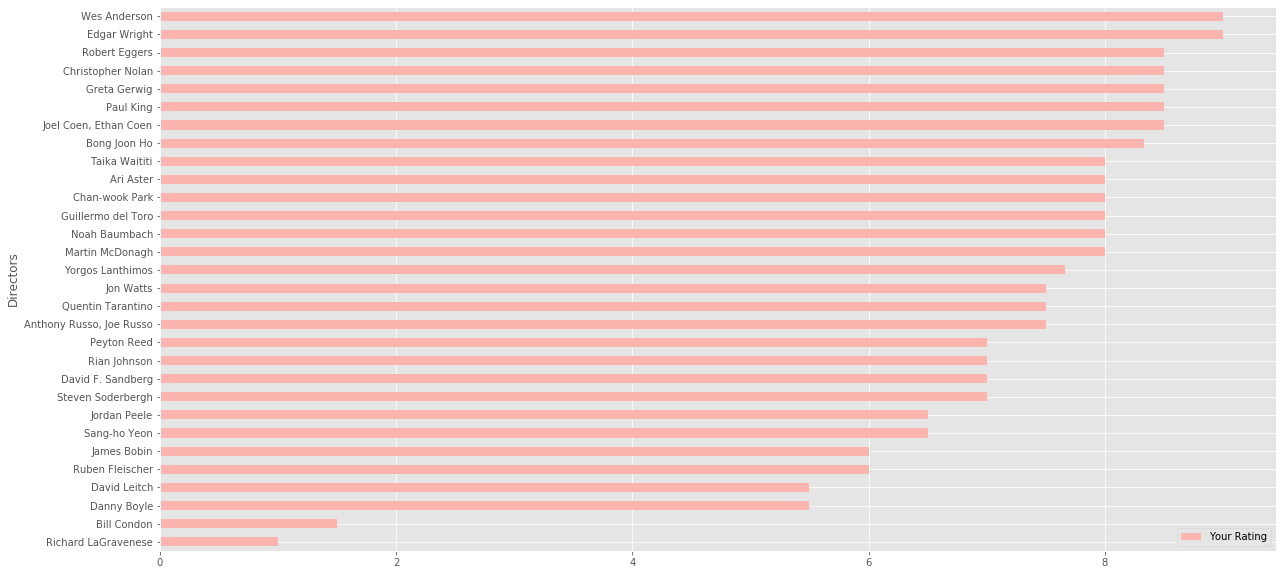

In [109]:
avg_rating_by_director.plot(x='Directors', kind= 'barh', width=0.5, figsize=(20,10), colormap='Pastel1')